In [52]:
#!pip install psycopg2

In [53]:
import psycopg2
import pandas as pd
import numpy as np
import csv

### verify the conexion
try:
    # Connect to the database
    conn = psycopg2.connect(
        host="pg.ujueta.com",
        port="5432",
        user="consultoria",
        password="LmKTXJBXya!14]f9!2k]",
        database="postgres",
    )
except psycopg2.Error as e:
    print("Error connecting to the database:")
    print(e)
else:
    print("Connection established successfully")

Connection established successfully


In [54]:

### ventas diario apiladas
def export_forecast_to_csv():
    try:
        # connect to the database
        conn = psycopg2.connect(
            host="pg.ujueta.com",
            port="5432",
            user="consultoria",
            password="LmKTXJBXya!14]f9!2k]",
            database="postgres",
        )

        # create cursor
        with conn.cursor() as cur:

            # ececute a sql query

            cur.execute("""SELECT * 
                           FROM forecast.ventas_diario 
                           WHERE docdate BETWEEN '2015-01-01' AND '2024-06-30' 
                                AND codigo_articulo IN ('MAEL2G100',	'SOELSI7200XP',	'SOFUFW181',	'SOELSI6140DV',	'SOELSI8180MP',	'SOELSI7160XP',	'HEFUFCD21',	'SOFUFW205CEL',	'SOELSI7130MP',
                                                        'MAEL2G65',	'SOSWSWW2060N',	'HEELCA1024S',	'SOSWSWA2040N',	'AUACEG250',	'SOSWSWA2650',	'AUACSH1000',	'HEELPW2275',	'HEELPW1565',
                                                        'MADUDG701',	'SOFUFW33',	'SOFUFW121',	'AUACPB400',	'SOSWSWP3060',	'HEELBM3514',	'SOELKITSI7160XP',	'AUACBD850',	'SOFUFW125',
                                                        'SOELSI8300MG',	'HEELXID20',	'HEELDH164515',	'HEFUFCD12KIT',	'MAEL2G40',	'SOFUFW185',	'SOELSI9220DV',	'SOELSI7175XP',	'MAEL2G25',
                                                        'AUACRIM4F',	'SOFUFW257',	'MAEL2G13',	'AUACAN4275',	'AUACRP120',	'SOELSI9250DV',	'HEELPW1770',	'SOFUFW161M',	'SOELSI9180DV',
                                                        'HEELCA2542D',	'MAEL2G10I',	'SOFUFW255P',	'SOFUFW35',	'HEELAG1165',	'SOELSI9220MP',	'SOSWSWA2057',	'SOSWSWA153N',	'HEFUFG71',
                                                        'HEELAG1420',	'AUACMTD624',	'AUELMC3',	'SOFUFW81',	'SOSWSWC690',	'AUACV515',	'AUACFC350',	'HEELCA1012D',	'HEELAG1141',
                                                        'HEELPW2482',	'HEELRM9026',	'AUACALS4',	'SOELCSVM501',	'SOFUFW83',	'SOELCSVM530',	'HEELCA5035',	'AUELMC5',	'AUACSC901',
                                                        'SOSWM1-111',	'SOELSI9300DV',	'HEELCA6205',	'SOSWSWC440N',	'HEFUFC25',	'HEELTA750',	'SOELSI9210DT',	'HEELTB500',	'HEELAG1142KIT',
                                                        'HEELVC0115P',	'AUACEG500',	'HEELBM5016',	'AUELMC12',	'SOFUFW131M',	'AUACALM4',	'AUACAT42',	'HEFUFHG18',	'HEFUFD52',
                                                        'SOSWM3-315',	'SOELSI7150DV',	'AUACBD1100',	'SOELSI8225AL',	'SOSWC1-811',	'SOELCSVM510',	'SOELSI6200MDV',	'HEELAG114',	'HEELXIW20',
                                                        'SOSWSWA2850',	'HEELCA6256',	'MAEL2G80',	'HEELEB7056',	'SOELAT2610254M',	'SOSWSWT2045',	'SOELSI6160MDV',	'HEELTA1500',	'HEELXBEA20',
                                                        'HEELEP181',	'AUACBD1522',	'AUELME611',	'MAEL2G950',	'HEELCA1510',	'AUACAE30',	'HEELCHS16',	'HEELXAG20',	'SOSWM3-215',
                                                        'HEELXBTP20',	'HEELDH7531',	'SOFUFW23',	'SOELCSVM760',	'SOELSIC40DV',	'HEELVC0640P',	'SOSWC1-651',	'AUACAT63',	'HEFUFCD10',
                                                        'MADUDG301-A',	'AUACOWL608',	'SOELRAFC209',	'HEELTA375',	'HEFUFCS2511',	'AUACALR4',	'SOSWSWA3250',	'MAELGPW2515',	'HEELHG1600',
                                                        'HEELTA550',	'HEELEB90758',	'AUELME624DC',	'HEELCS1425',	'SOSWM3-325',	'SOSWC1-611',	'HEFUFRM13030',	'SOELRAFC208',	'HEELVC2525P',
                                                        'AUELPA42',	'SOELCSVM750',	'HEELTA1100',	'AUACFENIX600',	'HEELAG230',	'HEELPS350',	'HEELMS1018',	'SOSWSWW2550',	'HEELDH1506',
                                                        'AUACHULK750',	'AUACFC351',	'AUACDG1224',	'AUACRIM4Z',	'SOFUFW50',	'SOSWT1-111',	'SOSWG1-110',	'SOELSI8225XP',	'AUACSC1800',
                                                        'HEFUFDH1320',	'HEELXID19',	'HEELSP500',	'AUACKH55K',	'AUACHULK950',	'SOELPES6300',	'HEELBV06',	'HEELVC0535P',	'SOSWSWW4070MV',
                                                        'SOSWP2-517',	'HEELRT1512',	'HEELRM7024',	'AUELCR433',	'AUACBOOM06T',	'SOSWSWT2035',	'AUACALH2',	'HEELID600',	'AUELSL5500L',
                                                        'MADUDG23I',	'AUACFX1000',	'HEELRM2604',	'HEELMS1021S',	'SOSWG1-114',	'SOSWSWW2760',	'SOSWM3-225',	'HEELPS250',	'HEFUFRM7024',
                                                        'AUELME811',	'HEELBV05',	'SOSWSWC1000',	'HEELDH4515',	'HEELTS255',	'HEELAG181',	'SOSWP1-440',	'SOELAT2635504M',	'SOSWM3-317',
                                                        'SOSWC1-669',	'SOSWSWT2033',	'HEFUFC124S',	'AUACAR200',	'HEELBV04',	'AUACOWL504',	'SOELSI9500MP',	'MADUDG123-A',	'SOSWM3-327',
                                                        'SOELPMS6505',	'HEELMT180KIT',	'AUACAH45',	'HEELDH2810',	'AUACHULK450',	'AUACKH70K',	'AUACAR380',	'AUACKH60K',	'AUACAC24NE',
                                                        'AUELEP100240',	'AUACHR42',	'HEELRM4210',	'HEFUFC112S',	'SOSWG2-213',	'SOSWSWW3552',	'AUAC265',	'AUACOP3090W',	'AUACEL12',
                                                        'SOSWG1-111',	'HEELAIRKIT5',	'HEELRM3209',	'AUACKH120K',	'HEELJS750',	'HEFUFPS25',	'AUACRT2415U',	'SOSWG2-214',	'SOSWC1-620',
                                                        'SOELCSVM830',	'AUACEG501',	'SOSWP2-513',	'HEELCS1427',	'AUELSL3000L',	'AUACFENIX601',	'AUACIN624',	'SOSWC1-941',	'AUACSPRING60R',
                                                        'AUACAE20',	'AUACAF24Li',	'SOSWC1-931',	'SOSWSWW5070MV',	'AUACAVANTI6000Z',	'SOSWP2-516',	'AUACAL3900U',	'AUELSL5000',	'AUELCR4301',
                                                        'AUACKCP200C',	'AUACMTD224',	'AUACSPRING70R',	'AUACKCP850R',	'SOSWG2-210',	'AUACSPRING60L',	'AUACKCP300C',	'AUACSPRING80R',	'AUACSPRING55R',
                                                        'AUACFL85265',	'AUACKCP501R',	'HEELRD1390',	'SOSWT1-115',	'AUACKCP801R',	'AUACKH160K',	'AUACKCP451C',	'SOSWP2-514',	'HEELXB0420',
                                                        'SOSWC1-921',	'SOELCSVM820',	'AUACHULK1500',	'AUACAE15',	'AUACBL05',	'SOSWM3-316',	'SOELSIC45DVP',	'HEFUBFCD21',	'AUACKCP950R',
                                                        'SOSWM1-125',	'MADUDG121-A',	'SOSWP1-330',	'HEFUFBD2110',	'SOSWP2-511',	'AUACKCP875R',	'AUACKH100K',	'AUACSPRING80L',	'AUACHULK400S',
                                                        'AUACKCP900R',	'AUACSPRING70L',	'AUACKH80K',	'AUACRT3FX',	'AUACKCP551R',	'AUACSPRING50R',	'AUACKCP376R',	'MAELMSG235S',	'SOSWG1-112',
                                                        'AUACKCP250R',	'AUACKH140K',	'HEELCINPU30410',	'AUACGC02',	'AUACKCP251C',	'AUELEE16',	'AUACMN20',	'AUACKCP975R',	'AUACKCP491R',
                                                        'HEFUFAG21B',	'AUACAR10SH',	'HEELXB0220',	'HEFUFID21B',	'SOSWP2-518',	'SOSWP2-520',	'AUACAE25',	'AUACBOOM04F',	'AUACVIPER100',
                                                        'SOSWP2-515',	'SOSWP2-411',	'SOSWP1-340',	'HEFUFCD12',	'AUACAC24NE500',	'AUACAC24NE600',	'AUACKCP575R',	'AUACSPRING50L',	'SOSWT1-112',
                                                        'AUACRC4SC',	'SOSWM1-114',	'HEELCINPA30410',	'HEELAIRKIT20',	'AUACRCBLT3',	'AUACKCP301R',	'AUAC4010',	'AUACSPRING55L',	'AUACRT4SC',
                                                        'SOSWM2-254',	'AUACKCP375C',	'AUACSPRING45R',	'SOSWM1-135',	'AUACKCP201R',	'AUACSPRING45L',	'MADUDG401I',	'AUACKCP450R',	'SOSWM1-117',
                                                        'HEELEBA11450',	'AUACKCP490C',	'SOSWC6-603',	'SOSWG2-211',	'SOSWP2-410',	'HEFUFTS2010',	'AUACSPRING35L',	'AUACSPRING35R',	'AUACCRAB03',
                                                        'HEFUCBFCD21',	'SOSWM2-251',	'SOSWPMSW02',	'AUACCRAB02',	'HEELEBA111630',	'HEELEBA3450',	'AUACKCP401R',	'HEELXB0520',	'AUACAR10SC901',
                                                        'HEELEBA5850',	'SOSWSWC1050MV',	'AUACKCP400C',	'AUACKCP350C',	'HEELEBA91630',	'AUACAP40',	'SOSWM3-323',	'SOSWM2-211',	'SOSWM3-326',
                                                        'SOSWP2-412',	'AUACSLB220',	'AUACAR10',	'HEELEBA1250',	'AUAC3-4-1',	'HEELEBA3430',	'SOSWP2-417',	'HEELEBA131630',	'HEELEBA1230',
                                                        'HEELID710',	'SOSWP2-414',	'AUACKCP351R',	'HEFUBFCD12',	'HEELEBA150',	'HEELEBA7850',	'HEELEBA5830',	'HEELEBA11850',	'SOSWC8-805',
                                                        'HEELID850',	'SOSWP2-512',	'AUACBOOM02',	'HEELEBA13850',	'HEELEBA7830',	'SOSWG2-217',	'AUACLD500',	'HEELEBA130',	'SOFUFWA4012',
                                                        'SOFUFW405',	'SOSWM3-313',	'AUACACCESSCAM',	'SOSWP2-510',	'SOSWG3-313',	'AUACCH1',	'SOELCSVM551',	'AUACSB9',	'AUACAF31C',
                                                        'HEELRM13030',	'SOFUFWA4013',	'HEELXCB20',	'SOSWM2-235',	'SOSWP2-409',	'SOSWC6-604',	'SOSWP2-413',	'AUACFS05',	'AUACSB4',
                                                        'SOSWM2-252',	'SOSWM2-265',	'SOSWM2-245',	'SOSWM2-272',	'SOSWP2-418',	'SOFUFWA4014',	'SOSWM1-113',	'SOSWM2-237',	'SOSWG3-311',
                                                        'AUACALK4',	'SOSWM2-311',	'HEFUCBFCD12',	'AUACKSH20',	'HEELXBLI20',	'SOSWG2-216',	'SOSWP2-427',	'SOSWP2-425',	'HEELEPBA634L',
                                                        'HEELEPBA634C',	'SOSWM2-215',	'SOSWM2-214',	'SOSWG3-314',	'SOSWM2-212',	'AUACFEX10',	'SOELRSF0810A',	'SOELRSF1012',	'SOSWP2-421',
                                                        'SOELREPSI8250MG-R12',	'SOELRSS0910A',	'SOELCSVM501IP',	'SOSWG3-316',	'SOSWM2-236',	'SOELRSS0608B',	'SOELRSS1012B',	'SOELRSF0810B',	'SOSWP2-420',
                                                        'SOELRSS0910B',	'SOSWM2-246',	'SOSWG3-312',	'SOSWP2-424',	'SOSWM2-312',	'SOSWM2-321',	'SOSWM2-210',	'SOSWM2-320',	'SOELRSA1012',
                                                        'SOSWM2-328',	'SOELRSS0608A',	'SOSWM2-257',	'SOSWM2-324',	'SOSWM2-325',	'SOSWM2-238',	'SOSWM2-217',	'SOSWM2-218',	'SOSWM2-229')
                            """)                           
            # fetch the results
            results = cur.fetchall()

            # open a file in the downloads folder

            with open(
                r"C:\Users\Alberto Florez\OneDrive\Documentos\GitHub\input_high.csv",
                #"/home/usuario/Escritorio/Consultorias_Empresariales/Ujueta/Datos/input_high.csv",
                "w",
                newline="",
            ) as f:
                # create a csv writer
                writer = csv.writer(f)

                # write the column names
                writer.writerow([col[0] for col in cur.description])

                # write the query results
                writer.writerows(results)
    except Exception as e:
        print(f"An error ocurred: {e}")
    finally:
        # close the cursor and connection
        if conn:
            conn.close()


# Call the function to export data to csv
export_forecast_to_csv()


In [55]:
### manipulate data

import pandas as pd

# carga de datas
data = pd.read_csv(
    r"C:\Users\Alberto Florez\OneDrive\Documentos\GitHub\input_high.csv"
    #"/home/usuario/Escritorio/Consultorias_Empresariales/Ujueta/Datos/input_high.csv"
)
# convertir en dataframe
df = pd.DataFrame(data)
df.head()

,docdate,codigo_articulo,cantidad
0,2020-01-02,AUAC265,1
1,2020-01-02,AUACAL3900U,4
2,2020-01-02,AUACALM4,5
3,2020-01-02,AUACALR4,10
4,2020-01-02,AUACEG250,1


In [56]:
import pandas as pd

def sumarizar_a_mensual(df, fecha_col, suma_col, agrupar_por=None):
    """
    Función para sumarizar datos diarios a un nivel mensual.

    Parámetros:
    ----------
    df : pd.DataFrame
        El DataFrame de entrada con los datos a procesar.
    fecha_col : str
        Nombre de la columna que contiene las fechas.
    suma_col : str
        Nombre de la columna cuyos valores se desean sumarizar.
    agrupar_por : list, optional
        Lista de columnas adicionales para agrupar (por defecto es None).
    
    Retorna:
    -------
    pd.DataFrame
        DataFrame con los datos agregados a nivel mensual.
    """
    # Asegurar que la columna de fecha esté en formato datetime
    df[fecha_col] = pd.to_datetime(df[fecha_col], errors='coerce')
    
    # Filtrar filas con fechas válidas
    df = df.dropna(subset=[fecha_col])
    
    # Crear la clave de agrupación mensual
    df['mes_inicio'] = df[fecha_col].dt.to_period('M').dt.to_timestamp()

    # Configurar las columnas para agrupar
    group_cols = ['mes_inicio'] + (agrupar_por if agrupar_por else [])

    # Realizar la agrupación y sumarización
    resultado = (
        df.groupby(group_cols, as_index=False)[suma_col]
        .sum()
    )

    return resultado


In [57]:
# Leer el archivo CSV
ranking_df = pd.read_csv(r"C:\Users\Alberto Florez\OneDrive\Documentos\GitHub\ranking_productor_M.csv")

# Filtrar los artículos del segmento "High"
high_segment_df = ranking_df[ranking_df['segmento'] == 'High']

# Obtener la lista de códigos de artículo
high_segment_skus = high_segment_df['codigo_articulo'].tolist()
print(len(high_segment_skus))
print(high_segment_skus)

109
['SOFUFW181', 'SOSWG2-210', 'SOSWG1-111', 'SOSWG1-110', 'HEELAG114', 'HEELAG1165', 'HEELCA1012D', 'SOELSI9220DV', 'SOELSI9180DV', 'HEELCA1510', 'SOELPMS6505', 'AUACEL12', 'SOELPES6300', 'SOELCSVM530', 'SOELCSVM510', 'SOELCSVM501', 'AUACPB400', 'AUACHR42', 'HEELVC0640P', 'HEELVC0115P', 'HEELDH164515', 'HEELRM9026', 'HEELPW1770', 'AUELMC5', 'HEELEP181', 'AUELMC3', 'SOSWP2-517', 'SOSWP2-514', 'SOSWP2-513', 'SOSWP2-511', 'AUACSH1000', 'AUACALM4', 'SOSWM2-235', 'AUACAE20', 'AUACRIM4Z', 'SOSWSWA2650', 'SOSWM2-211', 'AUACRIM4F', 'SOSWM1-111', 'SOSWP2-516', 'HEELCA6205', 'MAEL2G950', 'HEELPW2275', 'HEFUFC25', 'HEELCA2542D', 'MAEL2G13', 'HEELPS250', 'MAEL2G25', 'MAEL2G65', 'AUACFL85265', 'SOSWP2-515', 'MAELGPW2515', 'AUACAR10SH', 'HEELAG1141', 'HEELBV04', 'SOSWC1-651', 'SOSWC1-611', 'AUACFX1000', 'AUACV515', 'SOELSI8300MG', 'AUACRT3FX', 'AUACAH45', 'SOELAT2610254M', 'AUELCR433', 'AUELCR4301', 'HEELCA6256', 'HEELEB7056', 'HEELEB90758', 'HEELHG1600', 'AUACRCBLT3', 'HEELID600', 'SOSWC1-811', '

In [58]:
df_m_0 = sumarizar_a_mensual(df, 
    fecha_col='docdate', 
    suma_col= 'cantidad', 
    agrupar_por=['codigo_articulo']
)
print(df_m_0)

      mes_inicio codigo_articulo  cantidad
0     2020-01-01         AUAC265        47
1     2020-01-01        AUAC4010         2
2     2020-01-01        AUACAE15        12
3     2020-01-01        AUACAE20       181
4     2020-01-01        AUACAE25         3
...          ...             ...       ...
12391 2024-06-01    SOSWSWW2060N        10
12392 2024-06-01     SOSWSWW2550         1
12393 2024-06-01     SOSWSWW2760         1
12394 2024-06-01      SOSWT1-112         3
12395 2024-06-01      SOSWT1-115         5

[12396 rows x 3 columns]


In [59]:
# List of SKUs to filter
selected_skus = high_segment_skus
# Filter the dataset
filtered_df = df_m_0[df_m_0['codigo_articulo'].isin(selected_skus)]
filtered_df.rename(columns={'mes_inicio': 'docdate'}, inplace=True)

C:\Users\Alberto Florez\AppData\Local\Temp\ipykernel_90732\2620597273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'mes_inicio': 'docdate'}, inplace=True)


In [60]:
print(filtered_df)

         docdate codigo_articulo  cantidad
0     2020-01-01         AUAC265        47
3     2020-01-01        AUACAE20       181
5     2020-01-01        AUACAH45        44
6     2020-01-01     AUACAL3900U       140
7     2020-01-01        AUACALH2        89
...          ...             ...       ...
12378 2024-06-01      SOSWP2-516       125
12379 2024-06-01      SOSWP2-517       271
12380 2024-06-01      SOSWP2-518        23
12385 2024-06-01     SOSWSWA2650        35
12395 2024-06-01      SOSWT1-115         5

[5748 rows x 3 columns]


In [61]:
data_highdda = filtered_df.copy() 
data_highdda

,docdate,codigo_articulo,cantidad
0,2020-01-01,AUAC265,47
3,2020-01-01,AUACAE20,181
5,2020-01-01,AUACAH45,44
6,2020-01-01,AUACAL3900U,140
7,2020-01-01,AUACALH2,89
...,...,...,...
12378,2024-06-01,SOSWP2-516,125
12379,2024-06-01,SOSWP2-517,271
12380,2024-06-01,SOSWP2-518,23
12385,2024-06-01,SOSWSWA2650,35


In [62]:
#========================================================================================================================================
# Ajuste de Datos para statsforecast
#========================================================================================================================================

#-- Dato de ejemplo para función

def data_sf(df, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo'):
    df_m = df[[date, y, unique_id]]
    df_m.rename(columns={date : 'ds', y :'y', unique_id: 'unique_id'}, inplace=True)
  
    return df_m

df_m = data_sf(data_highdda, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo')
df_m
df_m.info()




<class 'pandas.core.frame.DataFrame'>
Index: 5748 entries, 0 to 12395
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         5748 non-null   datetime64[ns]
 1   y          5748 non-null   int64         
 2   unique_id  5748 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 179.6+ KB


In [63]:
#========================================================================================================================================
# Colección de modelos
#========================================================================================================================================
from statsforecast import StatsForecast #- Para instanciar los  modelos
from statsforecast.models import Naive

from statsforecast.models import (
    AutoARIMA,
    AutoETS,
    HoltWinters,
    ADIDA,
    CrostonClassic as Croston, 
    IMAPA,
    TSB,
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    Naive,
    SeasonalNaive,
    Theta,
    WindowAverage,
    Holt,
    CrostonOptimized,
)

#-- Parametros

# Número de días en el futuro a pronosticar
horizon = 7
# Ventana estacional: es 12 porque tenemos datos son mensuales
season_length = 12
# El número de dias que el modelo usará para hacer el forecast 
window_size = 3

# Lista de modelos a evaluar
models = [
    AutoARIMA(season_length=season_length),
    #AutoETS(season_length=season_length),
    HoltWinters(season_length=season_length),
    # ADIDA(),
    # Croston(),
    # IMAPA(),
    # TSB(alpha_d = 0.2, alpha_p = 0.2),
    # HistoricAverage(),
    DOT(season_length=season_length),
    # Naive(),
    SeasonalNaive(season_length=season_length),
    # Theta(),
    #WindowAverage(window_size=3) #,  # Adjust `window_size` as needed
    Holt() #,
    #CrostonOptimized()
]

In [64]:
# StatsForecast.plot(df_m)

# Instanciando StatsForecast como sf
sf = StatsForecast( 
    models=models,
    freq='MS', #MS
    n_jobs=-1,
)


In [65]:
# Cross Validation
from functools import partial
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mape, mase, mse, smape

crossvaldation_df = sf.cross_validation(
    df=df_m,
    h=horizon,
    step_size=horizon,
    n_windows=1
)

C:\Users\Alberto Florez\AppData\Roaming\Python\Python312\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [66]:
#-- Camb iar los valores negativos por ceros
list_col_ = (crossvaldation_df.select_dtypes(exclude=['datetime64[ns]'])).columns    

for col in list_col_:
    crossvaldation_df[col] = crossvaldation_df[col].clip(lower = 0)

crossvaldation_df.sample(7)

,ds,cutoff,y,AutoARIMA,HoltWinters,DynamicOptimizedTheta,SeasonalNaive,Holt
unique_id,,,,,,,,
SOSWG1-114,2024-01-01,2023-11-01,87.0,12.103303,36.642540,52.301125,3.0,52.295185
HEELHG1600,2023-12-01,2023-11-01,175.0,77.118225,91.371033,110.156509,179.0,26.223259
SOSWP2-513,2024-05-01,2023-11-01,233.0,162.521774,206.655167,174.804459,161.0,176.420197
SOSWM1-111,2024-04-01,2023-11-01,41.0,37.230896,26.992273,37.488766,25.0,38.956005
AUACAH45,2024-05-01,2023-11-01,60.0,51.910378,36.903927,51.457966,13.0,51.809334
MADUDG701,2024-06-01,2023-10-01,2.0,10.680991,12.357244,13.163918,16.0,13.643043
HEELEB90758,2024-06-01,2023-11-01,48.0,12.294950,45.552654,45.626308,32.0,21.666101


In [67]:
crossvaldation_df.to_excel(r"C:\Users\Alberto Florez\OneDrive\Documentos\GitHub\crossvaldation_df_14012025_2.xlsx")

In [68]:
def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['unique_id', 'ds', 'cutoff', 'y'], errors='ignore').columns.tolist()
    evals = []
    # Calculate loss for every unique_id and cutoff.    
    for cutoff in df['cutoff'].unique():
        eval_ = evaluate(df[df['cutoff'] == cutoff], metrics=[metric], models=models)
        evals.append(eval_)
    evals = pd.concat(evals)
    evals = evals.groupby('unique_id').mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

evaluation_df = evaluate_cross_validation(crossvaldation_df.reset_index(drop=False), smape)
evaluation_df.head(22)

,AutoARIMA,HoltWinters,DynamicOptimizedTheta,SeasonalNaive,Holt,best_model
unique_id,,,,,,
AUAC265,0.703467,0.230562,0.183194,0.412263,0.294985,DynamicOptimizedTheta
AUAC3-4-1,0.622207,0.639184,0.621923,0.691773,0.618448,Holt
AUACAE20,0.328312,0.378388,0.329652,0.312516,0.731256,SeasonalNaive
AUACAH45,0.360736,0.380777,0.359381,0.541554,0.360643,DynamicOptimizedTheta
AUACAL3900U,0.780323,0.355973,0.162334,0.316364,0.592840,DynamicOptimizedTheta
AUACALH2,0.507016,0.521121,0.522773,0.530173,0.519574,AutoARIMA
AUACALM4,0.155886,0.115523,0.193543,0.175393,0.511171,HoltWinters
AUACALR4,0.591386,0.550149,0.605856,0.711111,0.583495,HoltWinters
AUACAR10SH,0.339447,0.392976,0.347058,0.401134,0.340364,AutoARIMA


In [69]:
evaluation_df.to_excel(r"C:\Users\Alberto Florez\OneDrive\Documentos\GitHub\evaluation_df_14012025_2.xlsx")

In [70]:
#--- Selección del mejor modelo
fcst_df = sf.forecast(df=df_m, 
                      h=horizon, 
                      ## level=[90]
                     )
fcst_df.head()

C:\Users\Alberto Florez\AppData\Roaming\Python\Python312\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,HoltWinters,DynamicOptimizedTheta,SeasonalNaive,Holt
unique_id,,,,,,
AUAC265,2024-07-01,51.821510,80.707397,31.923365,144.0,27.838068
AUAC265,2024-08-01,23.255041,38.319099,31.923365,64.0,24.169125
AUAC265,2024-09-01,17.628380,28.181713,31.923365,50.0,20.500181
AUAC265,2024-10-01,4.485937,31.986271,31.923365,12.0,16.831238
AUAC265,2024-11-01,4.909123,42.838417,31.923365,14.0,13.162295


In [71]:
#-- Revisión para eliminar pornosticos constantes
fcst_df.reset_index(drop=False).groupby(['unique_id']).std()

,ds,AutoARIMA,HoltWinters,DynamicOptimizedTheta,SeasonalNaive,Holt
unique_id,,,,,,
AUAC265,66 days 02:52:18.679727723,1.649244e+01,17.595356,0.000000,45.529163,7.925823
AUAC3-4-1,66 days 01:01:16.736753050,1.017050e+00,41.418594,0.000000,176.595047,0.374875
AUACAE20,66 days 02:52:18.679727723,0.000000e+00,28.708242,0.000000,36.375031,3.531976
AUACAH45,66 days 02:52:18.679727723,5.394797e-06,9.415895,0.000000,20.113960,0.250330
AUACAL3900U,66 days 02:52:18.679727723,4.405629e+00,26.874775,0.000000,22.059444,5.286883
...,...,...,...,...,...,...
SOSWP2-517,66 days 02:52:18.679727723,6.469012e+01,89.551903,3.614071,191.689362,0.408659
SOSWP2-518,66 days 02:52:18.679727723,3.927374e+00,8.747815,0.000000,7.412987,0.001404
SOSWSWA2650,66 days 02:52:18.679727723,4.176382e+00,12.369997,0.000000,25.471739,0.593649


In [72]:
fcst_df

,ds,AutoARIMA,HoltWinters,DynamicOptimizedTheta,SeasonalNaive,Holt
unique_id,,,,,,
AUAC265,2024-07-01,51.821510,80.707397,31.923365,144.0,27.838068
AUAC265,2024-08-01,23.255041,38.319099,31.923365,64.0,24.169125
AUAC265,2024-09-01,17.628380,28.181713,31.923365,50.0,20.500181
AUAC265,2024-10-01,4.485937,31.986271,31.923365,12.0,16.831238
AUAC265,2024-11-01,4.909123,42.838417,31.923365,14.0,13.162295
...,...,...,...,...,...,...
SOSWT1-115,2024-09-01,4.869340,2.132250,4.546962,0.0,4.083803
SOSWT1-115,2024-10-01,4.869340,3.645893,4.546962,4.0,4.053370
SOSWT1-115,2024-11-01,4.869339,4.556526,4.546962,10.0,4.022938


C:\Users\Alberto Florez\AppData\Roaming\Python\Python312\site-packages\statsforecast\core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


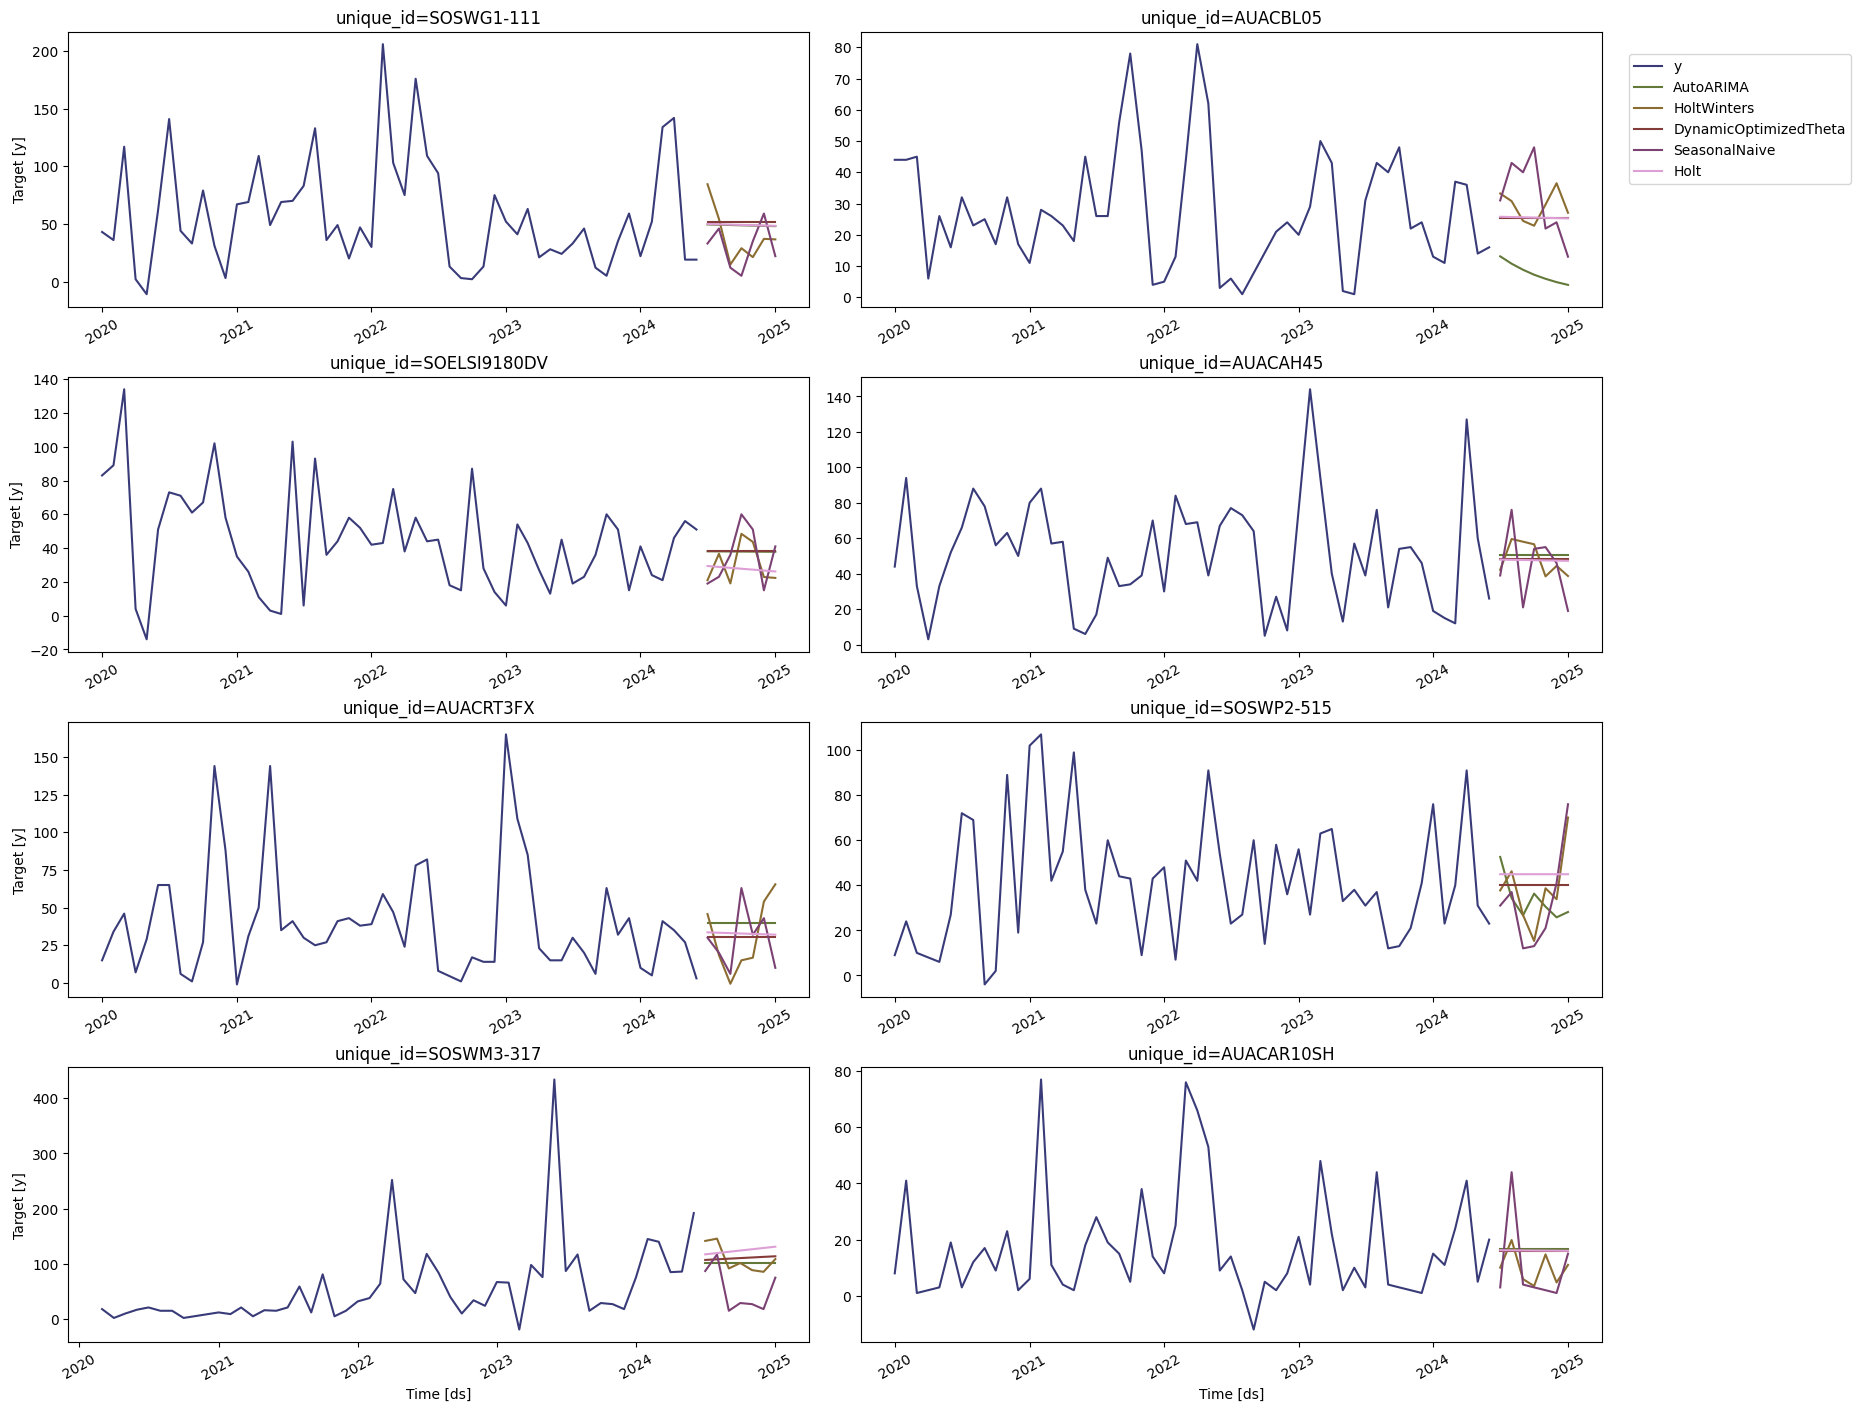

In [73]:
sf.plot(df_m,fcst_df)

In [74]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    # Clean and standardize column names
    forecasts_df.columns = forecasts_df.columns.str.strip().str.lower()
    evaluation_df['best_model'] = evaluation_df['best_model'].str.strip().str.lower()
    
    # Reset index to ensure 'unique_id' is a column
    forecasts_df = forecasts_df.reset_index()
    
    # Merge evaluation_df with forecasts_df
    merged_df = evaluation_df.merge(forecasts_df, on='unique_id', how='left')
    
    rows = []
    for _, row in merged_df.iterrows():
        best_model = row['best_model']
        
        # Validate best_model column
        if best_model not in forecasts_df.columns:
            raise KeyError(f"Model '{best_model}' not found in forecasts_df columns: {forecasts_df.columns.tolist()}")
        
        # Append the forecast value for the best model
        rows.append({'unique_id': row['unique_id'], 'ds': row['ds'], 'best_model': row[best_model]})
    
    # Convert to a dataframe
    result_df = pd.DataFrame(rows)
    return result_df

# Example usage
prod_forecasts_df = get_best_model_forecast(forecasts_df=fcst_df, evaluation_df=evaluation_df)
prod_forecasts_df['best_model'] = np.where(prod_forecasts_df['best_model']<0, 0, prod_forecasts_df['best_model'].round())
prod_forecasts_df

,unique_id,ds,best_model
0,AUAC265,2024-07-01,32.0
1,AUAC265,2024-08-01,32.0
2,AUAC265,2024-09-01,32.0
3,AUAC265,2024-10-01,32.0
4,AUAC265,2024-11-01,32.0
...,...,...,...
758,SOSWT1-115,2024-09-01,2.0
759,SOSWT1-115,2024-10-01,4.0
760,SOSWT1-115,2024-11-01,5.0
761,SOSWT1-115,2024-12-01,5.0


In [75]:
# Usar la función de agregación mensual

prod_forecasts_df_m = sumarizar_a_mensual(prod_forecasts_df, 
    fecha_col='ds', 
    suma_col='best_model', 
    agrupar_por=['unique_id']
)
print(prod_forecasts_df_m)

    mes_inicio    unique_id  best_model
0   2024-05-01   SOSWT1-111        25.0
1   2024-06-01    AUAC3-4-1       251.0
2   2024-06-01    AUACFC350        16.0
3   2024-06-01   SOSWM2-251         5.0
4   2024-06-01   SOSWT1-111        23.0
..         ...          ...         ...
758 2025-01-01   SOSWP2-516       112.0
759 2025-01-01   SOSWP2-517       385.0
760 2025-01-01   SOSWP2-518        24.0
761 2025-01-01  SOSWSWA2650        35.0
762 2025-01-01   SOSWT1-115         4.0

[763 rows x 3 columns]


In [76]:
prod_forecasts_df_m.to_excel("../output_Mensual_DemandHigh_14012025_2.xlsx", sheet_name='PronosticoMensual')